In [1]:
%run __init__.ipynb

Successfully connected to MongoDB


In [10]:
#Load data source
db_trend = get_datasource('WORLD_DB_TREND')
# db_trend

db_all = get_datasource('WORLD_DB_ALL')
db_all

,ENTITY_GROUPS,ENTITY,DATE,KPI,VALUE,VALUE_D-1,VARV,VARP,SCENARIO,DATE_ORDER,UNIT_VALUE,UNIT_VAR,UNIT_VARP,PRECISION_VALUE,PRECISION_VAR,PRECISION_VARP
0,Afghanistan,Afghanistan,2020-01-22,Confirmed,0.000000,0.000000,0.000000,NaN,22/01/2020,20200122,cases,cases,%,",.0f",",.0f",",.2f"
1,Afghanistan,Afghanistan,2020-01-23,Confirmed,0.000000,0.000000,0.000000,NaN,23/01/2020,20200123,cases,cases,%,",.0f",",.0f",",.2f"
2,Afghanistan,Afghanistan,2020-01-24,Confirmed,0.000000,0.000000,0.000000,NaN,24/01/2020,20200124,cases,cases,%,",.0f",",.0f",",.2f"
3,Afghanistan,Afghanistan,2020-01-25,Confirmed,0.000000,0.000000,0.000000,NaN,25/01/2020,20200125,cases,cases,%,",.0f",",.0f",",.2f"
4,Afghanistan,Afghanistan,2020-01-26,Confirmed,0.000000,0.000000,0.000000,NaN,26/01/2020,20200126,cases,cases,%,",.0f",",.0f",",.2f"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300307,Zimbabwe,Zimbabwe,2020-04-23,Recovery Rate,7.142857,7.142857,0.000000,NaN,23/04/2020,20200423,%,pts,NaN,",.2f",",.2f",NaN
300308,Zimbabwe,Zimbabwe,2020-04-24,Recovery Rate,6.896552,7.142857,-0.246305,NaN,24/04/2020,20200424,%,pts,NaN,",.2f",",.2f",NaN
300309,Zimbabwe,Zimbabwe,2020-04-25,Recovery Rate,6.451613,6.896552,-0.444939,NaN,25/04/2020,20200425,%,pts,NaN,",.2f",",.2f",NaN
300310,Zimbabwe,Zimbabwe,2020-04-26,Recovery Rate,6.451613,6.451613,0.000000,NaN,26/04/2020,20200426,%,pts,NaN,",.2f",",.2f",NaN


In [37]:
# #Get top 10 countries
# max_date = db_trend['DATE_ORDER'].max()
# filters =  ['Europe','Asia','Africa','North America','South America','Oceania','Other','To be affected']
# countries = db_trend[(db_trend['ENTITY_GROUPS'].isin(filters)) & (db_trend['DATE_ORDER'] == max_date) & (db_trend['KPI'] == 'Confirmed') & (db_trend['DATE_SCENARIO'] == 'Since beginning') & (db_trend['METRIC'] == 'VALUE')].sort_values(by= 'VALUE', ascending=False)['ENTITY'].drop_duplicates().values.tolist()[:10]
# print(countries)

In [38]:
#Get top 10 countries
max_date = db_all['DATE_ORDER'].max()
filters =  ['Europe','Asia','Africa','North America','South America','Oceania','Other','To be affected']
countries = db_all[(db_all['ENTITY_GROUPS'].isin(filters)) & (db_all['DATE_ORDER'] == max_date) & (db_all['KPI'] == 'Confirmed')].sort_values(by= 'VALUE', ascending=False)['ENTITY'].drop_duplicates().values.tolist()[:10]
print(countries)

['US', 'Spain', 'Italy', 'France', 'Germany', 'United Kingdom', 'Turkey', 'Iran', 'Russia', 'China']


In [39]:
db_loga = db_all.copy()

In [40]:
filters = ['WORLDWIDE','Europe','Asia','Africa','North America','South America','Oceania','Other','To be affected']
kpis = ['Confirmed','Active cases', 'Deaths','Recovered']
domain_loga = db_loga.copy()[(db_loga['ENTITY_GROUPS'].isin(filters)) & (db_loga['KPI'].isin(kpis))]
domain_loga = domain_loga.drop(['DATE'],axis=1).sort_values(by=['ENTITY','DATE_ORDER'],ascending=True)
domain_loga

,ENTITY_GROUPS,ENTITY,KPI,VALUE,VALUE_D-1,VARV,VARP,SCENARIO,DATE_ORDER,UNIT_VALUE,UNIT_VAR,UNIT_VARP,PRECISION_VALUE,PRECISION_VAR,PRECISION_VARP
5917,Asia,Afghanistan,Confirmed,0.0,0.0,0.0,NaN,22/01/2020,20200122,cases,cases,%,",.0f",",.0f",",.2f"
55969,Asia,Afghanistan,Deaths,0.0,0.0,0.0,NaN,22/01/2020,20200122,cases,cases,%,",.0f",",.0f",",.2f"
106021,Asia,Afghanistan,Recovered,0.0,0.0,0.0,NaN,22/01/2020,20200122,cases,cases,%,",.0f",",.0f",",.2f"
156073,Asia,Afghanistan,Active cases,0.0,0.0,0.0,NaN,22/01/2020,20200122,cases,cases,%,",.0f",",.0f",",.2f"
5918,Asia,Afghanistan,Confirmed,0.0,0.0,0.0,NaN,23/01/2020,20200123,cases,cases,%,",.0f",",.0f",",.2f"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155392,Africa,Zimbabwe,Active cases,25.0,25.0,0.0,0.000000,26/04/2020,20200426,cases,cases,%,",.0f",",.0f",",.2f"
5237,Africa,Zimbabwe,Confirmed,32.0,31.0,1.0,3.225806,27/04/2020,20200427,cases,cases,%,",.0f",",.0f",",.2f"
55289,Africa,Zimbabwe,Deaths,4.0,4.0,0.0,0.000000,27/04/2020,20200427,cases,cases,%,",.0f",",.0f",",.2f"
105341,Africa,Zimbabwe,Recovered,5.0,2.0,3.0,150.000000,27/04/2020,20200427,cases,cases,%,",.0f",",.0f",",.2f"


In [51]:
#Select top 10 countries
domain_loga = domain_loga[(domain_loga['ENTITY'].isin(countries))]

filters = domain_loga[['ENTITY','KPI']].drop_duplicates().values.tolist()
domain104 = pd.DataFrame()
for f in filters:
    entity = f[0]
    kpi = f[1]
    tmp_df = domain_loga[(domain_loga['ENTITY'] == entity) & (domain_loga['KPI'] == kpi)]
    tmp_df = tmp_df.sort_values(by='DATE_ORDER',ascending=True).reset_index(drop=True)
    
    #Calc if Confirmed
    if kpi == 'Confirmed':
        check_limit = tmp_df.loc[tmp_df['VARV'] > 30, 'VARV'].index
    elif kpi == 'Deaths':
        check_limit = tmp_df.loc[tmp_df['VARV'] > 3, 'VARV'].index
    elif kpi == 'Active cases':
        check_limit = tmp_df.loc[tmp_df['VARV'] > 50, 'VARV'].index
    elif kpi == 'Recovered':
        check_limit = tmp_df.loc[tmp_df['VARV'] > 30, 'VARV'].index
        
    if len(check_limit) == 0:
        next
    else:
        limit = check_limit[0]
        indexes = tmp_df.loc[tmp_df.index < limit, 'VARV'].index
        tmp_df = tmp_df.drop(indexes,axis=0).reset_index(drop=True)
        
    tmp_df['INDEX'] = tmp_df.index
    tmp_df['DATE'] = 'D' + tmp_df['INDEX'].astype(str)

    def calc_ave(row,df):
        i_min = row['INDEX'] - 6
        i_max = row['INDEX'] + 1
        list_filters = []
        for i in range(i_min,i_max):
            list_filters.append(str(i))
        df = df[df['INDEX'].isin(list_filters)]
        average = df['VARV'].sum()/7
        return average

    tmp_df['VALUE_LOGA'] = tmp_df.apply(lambda row: calc_ave(row,tmp_df), axis=1).fillna(0)
    domain104 = domain104.append(tmp_df)
    
domain104.to_csv(output_folder + '104.csv',sep=";")
if use_mongo:
    bob.mongo.save_df(domain104,'104',db_app,True)
domain104

Dataframe 104 successfully save in database app-wsr-dev in MongoDB. Time: --- 0.15814566612243652 secnds ---


,ENTITY_GROUPS,ENTITY,KPI,VALUE,VALUE_D-1,VARV,VARP,SCENARIO,DATE_ORDER,UNIT_VALUE,UNIT_VAR,UNIT_VARP,PRECISION_VALUE,PRECISION_VAR,PRECISION_VARP,INDEX,DATE,VALUE_LOGA
0,Asia,China,Confirmed,548.0,0.0,548.0,NaN,22/01/2020,20200122,cases,cases,%,",.0f",",.0f",",.2f",0,D0,78.285714
1,Asia,China,Confirmed,643.0,548.0,95.0,17.335766,23/01/2020,20200123,cases,cases,%,",.0f",",.0f",",.2f",1,D1,91.857143
2,Asia,China,Confirmed,920.0,643.0,277.0,43.079316,24/01/2020,20200124,cases,cases,%,",.0f",",.0f",",.2f",2,D2,131.428571
3,Asia,China,Confirmed,1406.0,920.0,486.0,52.826087,25/01/2020,20200125,cases,cases,%,",.0f",",.0f",",.2f",3,D3,200.857143
4,Asia,China,Confirmed,2075.0,1406.0,669.0,47.581792,26/01/2020,20200126,cases,cases,%,",.0f",",.0f",",.2f",4,D4,296.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,Europe,United Kingdom,Active cases,119743.0,115804.0,3939.0,3.401437,23/04/2020,20200423,cases,cases,%,",.0f",",.0f",",.2f",46,D46,4247.428571
47,Europe,United Kingdom,Active cases,124349.0,119743.0,4606.0,3.846571,24/04/2020,20200424,cases,cases,%,",.0f",",.0f",",.2f",47,D47,4225.857143
48,Europe,United Kingdom,Active cases,128414.0,124349.0,4065.0,3.269025,25/04/2020,20200425,cases,cases,%,",.0f",",.0f",",.2f",48,D48,4144.571429
49,Europe,United Kingdom,Active cases,132465.0,128414.0,4051.0,3.154640,26/04/2020,20200426,cases,cases,%,",.0f",",.0f",",.2f",49,D49,3974.857143


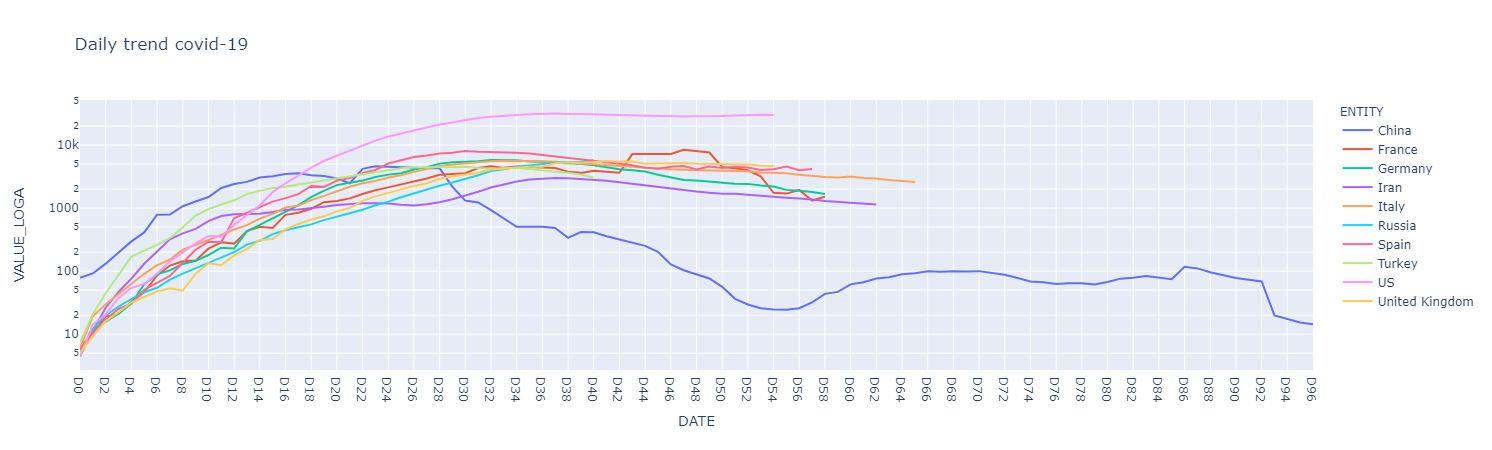

In [54]:
import plotly.graph_objects as go

fig = go.Figure()

dfD = domain104[domain104['KPI'] == 'Confirmed']
fig = px.line(dfD, x="DATE", y="VALUE_LOGA", color='ENTITY', title='Daily trend covid-19')
fig.update_yaxes(type="log")
fig.show()